## MLFlow POC
Ref: 
-https://medium.com/towards-artificial-intelligence/how-i-started-tracking-my-ml-experiments-like-a-pro-dba184beb34
-https://github.com/terryz1/Iris_Classification/blob/master/iris_classification.ipynb

In [62]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from pandas.plotting import parallel_coordinates
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
import mlflow.sklearn

## Load Data

In [74]:
def load_iris_data():
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
    dataset = pd.read_csv(url, names = attributes)
    dataset.columns = attributes
    train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['class'], random_state = 42)
    X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
    Y_train = train["class"]
    X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
    Y_test = test["class"]
    input_data = (train, test, X_train, X_test, y_train, y_test)
    return input_data

data = load_iris_data()
train, test, X_train, X_test, y_train, y_test = data
print(train.head(10))

     sepal_length  sepal_width  petal_length  petal_width            class
8             4.4          2.9           1.4          0.2      Iris-setosa
106           4.9          2.5           4.5          1.7   Iris-virginica
76            6.8          2.8           4.8          1.4  Iris-versicolor
9             4.9          3.1           1.5          0.1      Iris-setosa
89            5.5          2.5           4.0          1.3  Iris-versicolor
146           6.3          2.5           5.0          1.9   Iris-virginica
94            5.6          2.7           4.2          1.3  Iris-versicolor
133           6.3          2.8           5.1          1.5   Iris-virginica
135           7.7          3.0           6.1          2.3   Iris-virginica
117           7.7          3.8           6.7          2.2   Iris-virginica


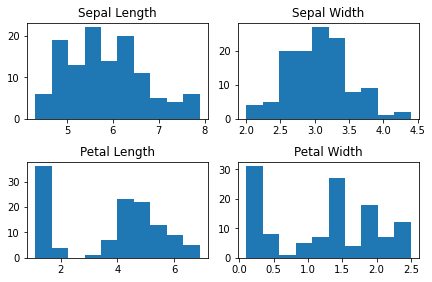

In [69]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

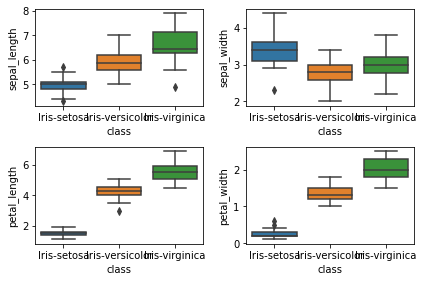

In [73]:
# boxplots using seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'class', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'class', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'class', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'class', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

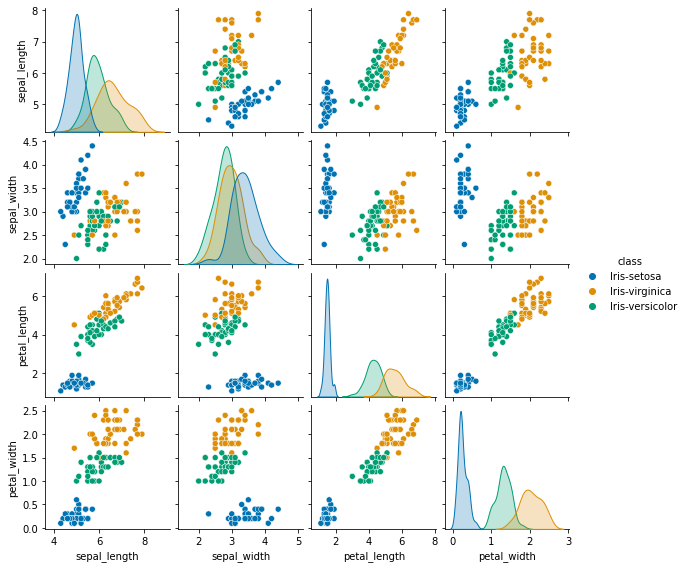

In [75]:
sns.pairplot(train, hue="class", height = 2, palette = 'colorblind');

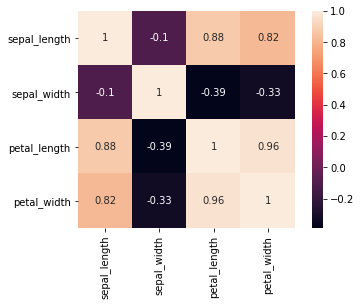

In [79]:
corMatrix = train.corr()
sns.heatmap(corMatrix, annot = True, square = True);

In [97]:
print(X_train.shape)
print(X_train)

(120, 4)
     sepal_length  sepal_width  petal_length  petal_width
8             4.4          2.9           1.4          0.2
106           4.9          2.5           4.5          1.7
76            6.8          2.8           4.8          1.4
9             4.9          3.1           1.5          0.1
89            5.5          2.5           4.0          1.3
..            ...          ...           ...          ...
37            4.9          3.1           1.5          0.1
2             4.7          3.2           1.3          0.2
33            5.5          4.2           1.4          0.2
52            6.9          3.1           4.9          1.5
3             4.6          3.1           1.5          0.2

[120 rows x 4 columns]


In [98]:
print(y_train.shape)
print(y_train)

(120,)
[1 1 2 2 2 0 2 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2
 0 1 1 0 2 2 2 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0
 0 1 0 0 2 1 0 0 0 1 0 1 0 1 2 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0
 1 0 2 2 2 1 0 2 0]


In [99]:
print(X_test.shape)
print(X_test)

(30, 4)
     sepal_length  sepal_width  petal_length  petal_width
38            4.4          3.0           1.3          0.2
127           6.1          3.0           4.9          1.8
57            4.9          2.4           3.3          1.0
93            5.0          2.3           3.3          1.0
42            4.4          3.2           1.3          0.2
56            6.3          3.3           4.7          1.6
22            4.6          3.6           1.0          0.2
20            5.4          3.4           1.7          0.2
147           6.5          3.0           5.2          2.0
84            5.4          3.0           4.5          1.5
107           7.3          2.9           6.3          1.8
141           6.9          3.1           5.1          2.3
104           6.5          3.0           5.8          2.2
51            6.4          3.2           4.5          1.5
7             5.0          3.4           1.5          0.2
49            5.0          3.3           1.4          0.2
14    

In [100]:
print(y_test.shape)
print(y_test)

(30,)
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


## Decision Tree Model

In [117]:
def train_predict_evaluate_dtree(params):
    with mlflow.start_run(run_name = "Decision Tree Classifier Experiments"):
        dtModel = DecisionTreeClassifier(random_state=42, max_leaf_nodes=params['leaf_nodes'], max_depth=params['max_depth'])
        dtModel.fit(X_train, y_train)
        y_pred = dtModel.predict(X_test)
        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        test_f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
        test_metrics = (test_accuracy, test_f1_score)
        print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))
        
        mlflow.log_metric('test_accuracy' , test_accuracy)
        mlflow.log_metric('test_f1_score', test_f1_score)
        mlflow.log_param('leaf_nodes' , params.get('leaf_nodes'))
        mlflow.log_param('max_depth', params.get('max_depth'))
        
    return dtModel, test_metrics

params = {'leaf_nodes': 5, 'max_depth' :3}
dtModel, test_metrics = train_predict_evaluate_dtree(params)

The accuracy of the Decision Tree is 0.267


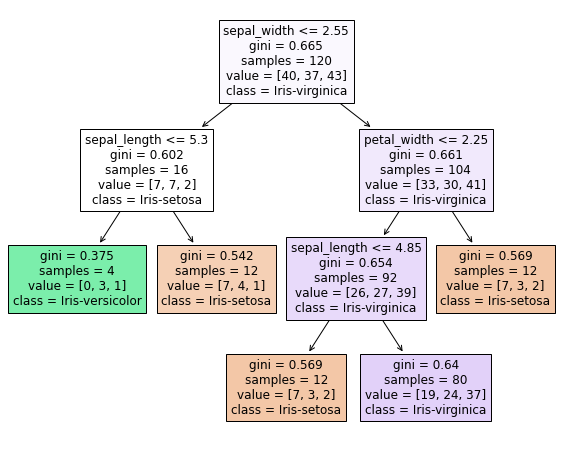

In [118]:
plt.figure(figsize = (10,8))
plot_tree(dtModel, feature_names = fn, class_names = cn, filled = True);